In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import colors
from sympy import sieve, prime, primerange
import itertools
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/esultano/git/elliptic_curves/data/candidates.txt.result.csv', header=None)
num_curves = df.shape[0]
mat = [None]*num_curves

with open('C:/Users/esultano/git/elliptic_curves/data/candidates.txt') as f:
    for i, line in enumerate(f.readlines()):
        line = line.strip()
        curve = eval(line)
        mat[i] = [curve[0], curve[-1]]

df_conductor = pd.DataFrame(mat, columns =['conductor', 'sgn']) 

df['conductor'] = df_conductor['conductor']
df['sgn'] = df_conductor['sgn']

In [3]:
df.head()

,0,1,2,3,4,5,6,conductor,sgn
0,0,1,1,-2170,-22522,2.817892,3.125294,449000984309,1
1,1,-1,0,239,32148,3.082726,3.556700,449001315611,-1
2,0,0,1,-32540,-2259073,2.315139,2.724547,449002105613,1
3,0,1,1,288,32280,3.393803,3.742263,449002390891,-1
4,0,1,1,-2126,-20328,3.469306,3.777924,449002538981,1


In [4]:
max_conductor = df['conductor'].max()

sortedlist = df["conductor"].tolist()
sortedlist.sort()
df['primeidx'] = df['conductor'].apply(lambda x: sortedlist.index(x))

#def primes(n):
#    sieve = [True] * n
#    for i in range(3,int(n**0.5)+1,2):
#        if sieve[i]:
#            sieve[i*i::2*i]=[False]*((n-i*i-1)//(2*i)+1)
#    return [2] + [i for i in range(3,n,2) if sieve[i]]

#primelist = primes(max_conductor+1)
#df['primeidx'] = df['conductor'].apply(lambda x: primelist.index(x))

#primelist = list(sieve.primerange(1,max_conductor+1))
#df['primeidx'] = df['conductor'].apply(lambda x: primelist.index(x))

#df['primeidx'] = df['conductor'].apply(lambda x: sieve.search(x)[0])

In [ ]:
df.to_csv('candidates.txt.result_primecond.csv', sep=',')

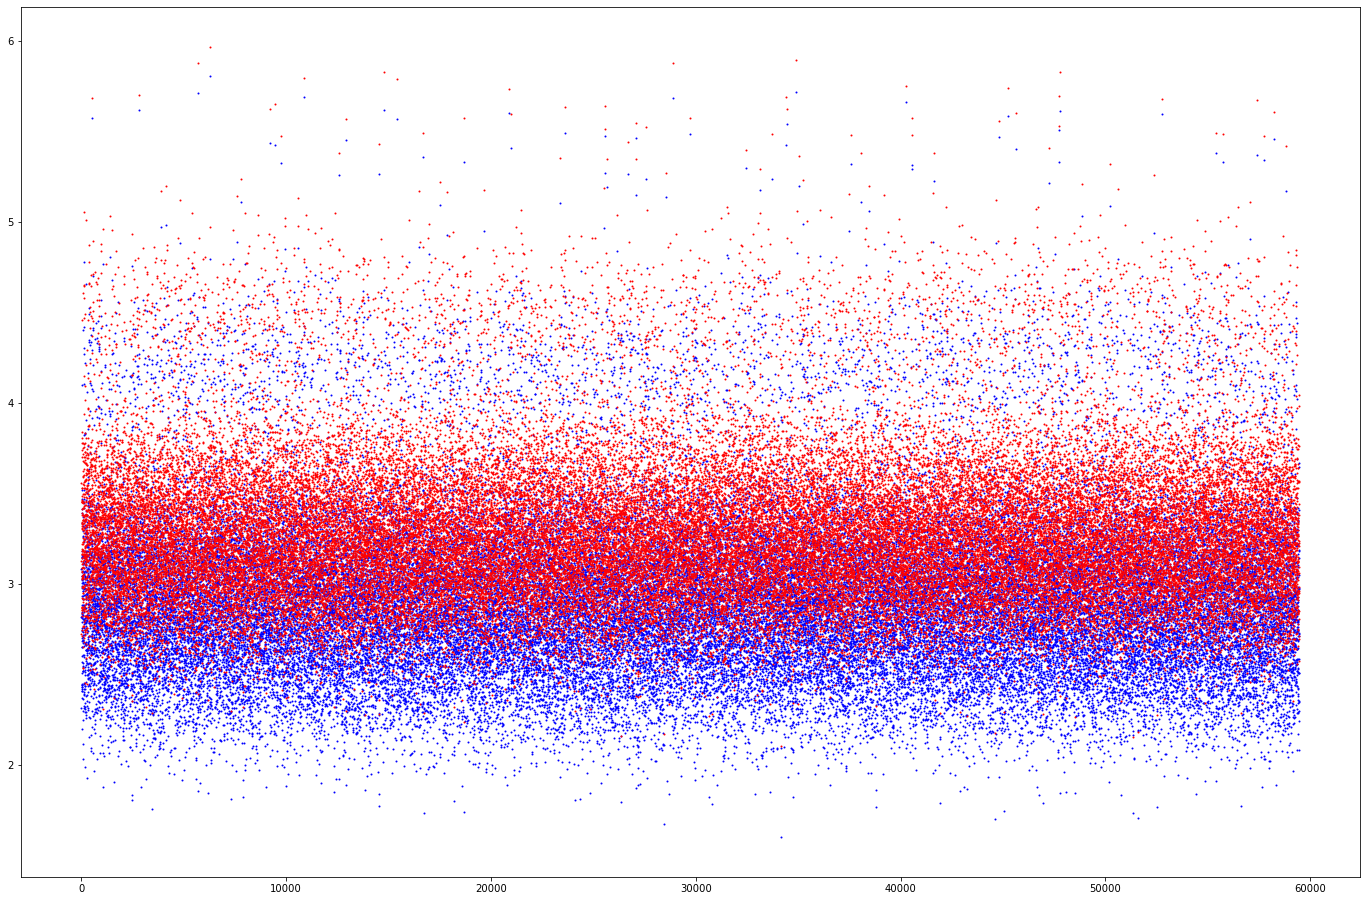

In [5]:
x = df["primeidx"].tolist()
y1 = df[5].tolist()
y2 = df[6].tolist()

plt.figure(figsize=(24, 16))
plt.scatter(x, y1, color='blue', s=1)
plt.scatter(x, y2, color='red', s=1)
plt.show()

In [ ]:
x = df["conductor"].tolist()
y1 = df[5].tolist()
y2 = df[6].tolist()

plt.figure(figsize=(24, 16))
plt.scatter(x, y1, color='blue', s=1)
plt.scatter(x, y2, color='red', s=1)
plt.xlim([1.9*10**13, 1.9100*10**13])
plt.show()